## Calculating the RMS of Sea Level Anomaly

The principle here is that the model has absoluate sea level, $\eta$. We also save $\eta^2$. But these are absolute values, not the anomaly from the mean. To calculate the RMS of the Sea Level Anomaly, we want to find

$$R = \left(\overline{(\eta - \overline{\eta})^2}\right)^{1/2}$$
$$ = \left(\overline{\eta^2 - 2 \eta \overline{\eta} + \overline{\eta}^2}\right)^{1/2}$$
$$ = \left(\overline{\eta^2} - 2 \overline{\eta} \overline{\eta} + \overline{\eta}^2\right)^{1/2}$$
$$ = \left(\overline{\eta^2} -  \overline{\eta}^2\right)^{1/2}$$

Thus, we can take the temporal mean of $\eta$ and $eta^2$ to find $R$.

Set `ekey` below to plot different experiments.

In [1]:
%pylab inline

import pandas as pd
import intake
catalog = intake.cat.access_nri
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import xarray as xr
import scipy as sp
import pandas as pd
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft

from dask.distributed import Client, progress

import sys, os

os.chdir(os.path.join(os.getcwd(), "ACCESS-OM2-updated/figures/ssh_variance"))
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
aviso_clim_tstart = pd.to_datetime('1993', format='%Y')
aviso_clim_tend = aviso_clim_tstart + pd.DateOffset(years=22)

In [3]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

## To deal with memory issues:
* In a terminal on VDI (either over VNC or through SSH and inside screen/tmux), run:
`dask-scheduler`
* This should output the scheduler address, like `tcp://10.6.43.39:8786`. 
* Now, in another terminal (ensuring that the default conda module has cosima_cookbook installed, as all workers will need access to that), run:
`dask-worker tcp://10.6.43.39:8786 --local-directory /local/g40/aek156`
* Then, make sure the following cell matches the scheduler address.

In [4]:
client = Client("tcp://10.6.43.39:8786")
client

<Client: 'tcp://10.6.45.53:8786' processes=1 threads=48, memory=188.56 GiB>

In [6]:
%%time
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='sea_level')
darray = var_search.to_dask()
darray = darray['sea_level']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
    
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='sea_levelsq')
darray = var_search.to_dask()
darray = darray['sea_levelsq']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_levelsq = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
sla_rms_1deg = (sea_levelsq - sea_level**(2.0))**(0.5)
sla_rms_1deg.load()

CPU times: user 1.18 s, sys: 301 ms, total: 1.48 s
Wall time: 20.1 s


<xarray.DataArray (yt_ocean: 300, xt_ocean: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77

In [7]:
%%time
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='sea_level')
darray = var_search.to_dask()
darray = darray['sea_level']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
    
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='sea_levelsq')
darray = var_search.to_dask()
darray = darray['sea_levelsq']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_levelsq = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
sla_rms_025deg = (sea_levelsq - sea_level**(2.0))**(0.5)
sla_rms_025deg.load()

CPU times: user 1.18 s, sys: 75.8 ms, total: 1.25 s
Wall time: 1min 46s


<xarray.DataArray (yt_ocean: 1080, xt_ocean: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95

In [12]:
%%time
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

chunks={'xt_ocean': 400, 'yt_ocean': 300}

cat_subset = catalog[expt]
var_search = cat_subset.search(variable='eta_t', frequency='1 daily')
darray = var_search.to_dask()
darray = darray['eta_t']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_level = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
    
cat_subset = catalog[expt]
var_search = cat_subset.search(variable='sea_levelsq')
darray = var_search.to_dask()
darray = darray['sea_levelsq']
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
sea_levelsq = darray.sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).mean('time')
sla_rms_01deg = (sea_levelsq - sea_level**(2.0))**(0.5)
sla_rms_01deg.load()

CPU times: user 23.1 s, sys: 792 ms, total: 23.9 s
Wall time: 1h 37min 34s


<xarray.DataArray (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98

In [9]:
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
SLMA = xr.open_dataset(aviso_file).SLMA.mean('TAXM')

<xarray.DataArray 'SLMA' ()>
array(0.48542805)
<xarray.DataArray 'SLMA' ()>
array(0.42218293)
Coordinates:
    quantile  float64 0.9999


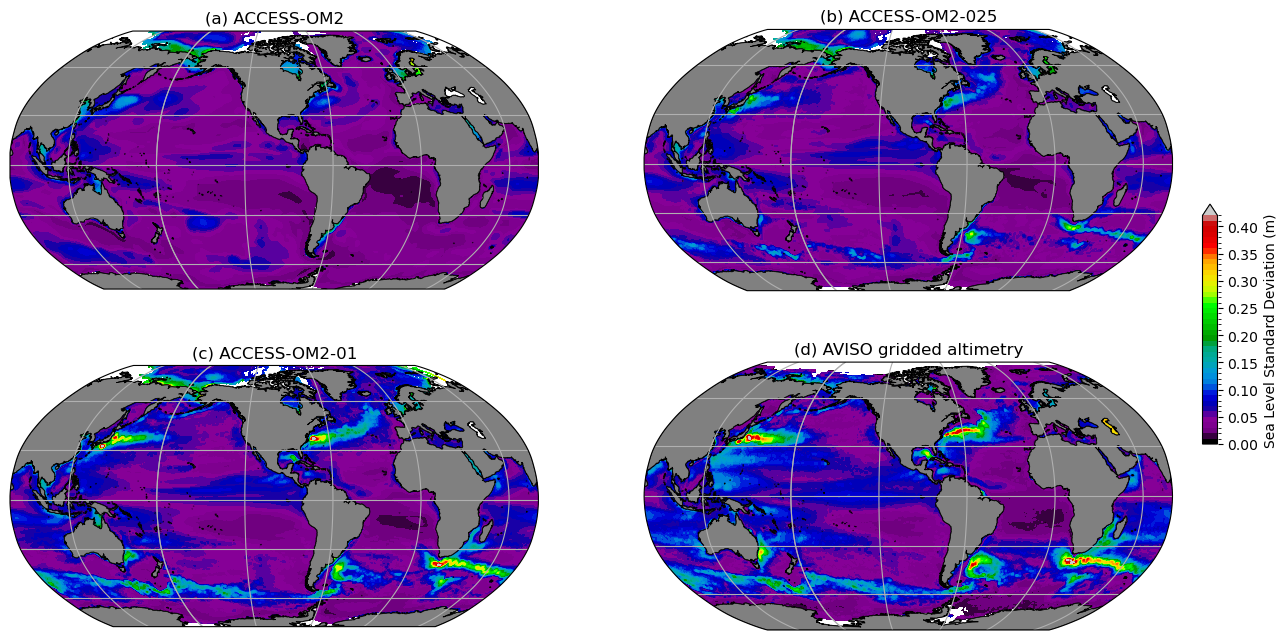

In [13]:
plt.figure(figsize=(15,8))
print(SLMA.max())
print(SLMA.quantile(.9999))
clev = np.arange(0,0.4201,0.01)
# cmp = plt.get_cmap('gist_ncar_r') # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('nipy_spectral')
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gray',linewidth=0.5)
    
ax = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
p1 = sla_rms_1deg.plot.contourf(cmap=cmp,levels=clev,add_colorbar=False,
                                extend='max',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('(a) ACCESS-OM2')

ax = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
p1 = sla_rms_025deg.plot.contourf(cmap=cmp,levels=clev,add_colorbar=False,
                                extend='max',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('(b) ACCESS-OM2-025')

ax = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
p1 = sla_rms_01deg.plot.contourf(cmap=cmp,levels=clev,add_colorbar=False,
                                extend='max',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('(c) ACCESS-OM2-01')

ax = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
p1 = SLMA.plot.contourf(cmap=cmp,levels=clev,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title('(d) AVISO gridded altimetry')

ax3 = plt.axes([0.92,0.35,0.01,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Sea Level Standard Deviation (m)')

savefigure('sea_level_anomaly_rms')
